# Q3. In the given I set of images from poly1.png to poly14.png, let poly1 to poly 7 belong to class 1 and poly 8 to poly 14 belong to class 2. Assume that all the weights of the perceptron are initialized as 0 with the learning rate of 0.01.

*   Identify two discriminant features $x_{1}$ and $x_{2}$ for the two target classes $\omega = ${$\omega_{1}, \omega_{2}$}. Here, $\omega_{1}$ - class 1 and $\omega_{2}$ - class 2.
*   Generate an input feature vector $X$ for all the images mapping them to a corresponding taget classes $\omega_{i}$, where $i ∈ (1, 2)$.
*   Train a **single perceptron and SVM** to learn the feature vector $X$ mapping to $\omega$.
*   Plot and draw the final decision boundary separating the three classes

### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from cvxopt import matrix, solvers

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving poly1.png to poly1.png
Saving poly2.png to poly2.png
Saving poly3.png to poly3.png
Saving poly4.png to poly4.png
Saving poly5.png to poly5.png
Saving poly6.png to poly6.png
Saving poly7.png to poly7.png
Saving poly8.png to poly8.png
Saving poly9.png to poly9.png
Saving poly10.png to poly10.png
Saving poly11.png to poly11.png
Saving poly12.png to poly12.png
Saving poly13.png to poly13.png
Saving poly14.png to poly14.png


In [ ]:
ls=[]

class1 = ["poly1.png", "poly2.png", "poly3.png", "poly4.png", "poly5.png", "poly6.png", "poly7.png"]

for image in class1:
    img = cv.imread(image)
    img = cv.resize(img, (256, 256))
    
    b, g, r = cv.split(img)
    
    img = cv.merge((r, g, b))
    ls.append(img)

In [ ]:
ls2=[]

class2 = ["poly8.png", "poly9.png", "poly10.png", "poly11.png", "poly12.png", "poly13.png", "poly14.png"]

for image in class2:
    img = cv.imread(image)
    img = cv.resize(img, (256, 256))
    
    b, g, r = cv.split(img)
    
    img = cv.merge((r, g, b))
    ls2.append(img)

(-0.5, 511.5, 255.5, -0.5)

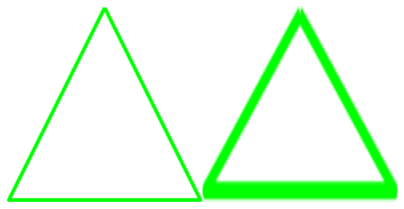

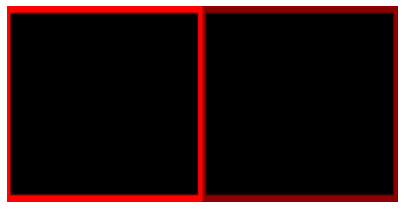

In [ ]:
plt.figure(figsize = (7, 7))
plt.imshow(np.concatenate((ls[0], ls[1]), axis = 1))
plt.axis('off')

plt.figure(figsize = (7, 7))
plt.imshow(np.concatenate((ls2[0], ls2[1]), axis = 1))
plt.axis('off')

## Single Perceptron

### Defining the necessary functions used

In [ ]:
def perceptron_training_alg(X, Y, learning_rate):
  # Adding Bias to the input and Randomly initializing weights
  num_samples, num_features = X.shape
  
  X = np.hstack((np.ones((num_samples, 1)), X))
  W = np.zeros(num_features + 1).reshape((-1, 1))

  weight_vector = []
  weight_vector.append(W)

  print(W, "\n")
  
  # Running the algorithm until all the data points are correctly classified
  samples_misclassified = True
  cnt=0
  while samples_misclassified and cnt < 100000:
    # Initially we'll assume that there are no misclassified samples
    samples_misclassified = False
    
    for index, x in enumerate(X):
      if cnt >= 100000:
        return W, np.array(weight_vector)
      
      x = Y[index] * x
      
      if np.dot(x.reshape((1, -1)), W) <= 0: # if samples misclassified
        samples_misclassified = True
        W = W + (learning_rate * x.reshape((-1, 1)))     # Gradient Descent Step
        weight_vector.append(W)

        print(W, "\n")
        cnt += 1
  
  return W, np.array(weight_vector)

### Code

In [ ]:
X = []

for img in ls:
    r, g, b = cv.split(img)
    X.append([np.sum(r)/np.sum(r+g+b), np.sum(g)/np.sum(r+g+b)])

for img in ls2:
    r, g, b = cv.split(img)
    X.append([np.sum(r)/np.sum(r+g+b), np.sum(g)/np.sum(r+g+b)])

In [ ]:
Y=np.concatenate((np.ones(len(ls))*-1,np.ones(len(ls2))))
ans=np.concatenate((np.zeros(len(ls)),np.ones(len(ls2))))

In [ ]:
X=np.stack(X)
X

array([[0.96962233, 1.02958576],
       [0.88314034, 1.08201861],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.01528142, 1.03526193],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.01927362, 0.89945752],
       [1.        , 0.        ],
       [1.        , 0.        ]])

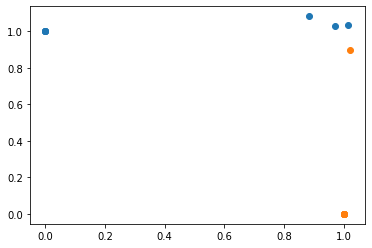

In [ ]:
plt.scatter(X[:7,0],X[:7,1])
plt.scatter(X[7:,0],X[7:,1])
plt.show()

In [ ]:
W, weight_vector=perceptron_training_alg(X,Y,0.01)

[[0.]
 [0.]
 [0.]] 

[[-0.01      ]
 [-0.00969622]
 [-0.01029586]] 

[[ 0.        ]
 [ 0.00030378]
 [-0.01029586]] 

[[ 0.01      ]
 [ 0.01049651]
 [-0.00130128]] 

[[ 0.        ]
 [ 0.00080029]
 [-0.01159714]] 

[[ 0.01      ]
 [ 0.01099303]
 [-0.00260256]] 

[[ 0.        ]
 [ 0.0012968 ]
 [-0.01289842]] 

[[ 0.01      ]
 [ 0.01148954]
 [-0.00390385]] 

[[ 0.        ]
 [ 0.00179332]
 [-0.0141997 ]] 

[[ 0.01      ]
 [ 0.01198605]
 [-0.00520513]] 

[[ 0.        ]
 [ 0.00228983]
 [-0.01550099]] 

[[ 0.01      ]
 [ 0.01248256]
 [-0.00650641]] 

[[ 0.        ]
 [ 0.00278634]
 [-0.01680227]] 

[[ 0.01      ]
 [ 0.01297908]
 [-0.00780769]] 

[[ 0.        ]
 [ 0.00328285]
 [-0.01810355]] 

[[ 0.01      ]
 [ 0.01347559]
 [-0.00910898]] 

[[ 0.        ]
 [ 0.00377937]
 [-0.01940483]] 

[[ 0.01      ]
 [ 0.0139721 ]
 [-0.01041026]] 

[[ 0.        ]
 [ 0.00427588]
 [-0.02070612]] 

[[ 0.01      ]
 [ 0.01446862]
 [-0.01171154]] 

[[ 0.        ]
 [ 0.00477239]
 [-0.0220074 ]] 

[[ 0.01      ]
 [ 0

In [ ]:
W

array([[ 0.01      ],
       [ 0.02145972],
       [-0.03128754]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


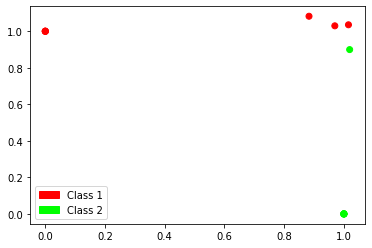

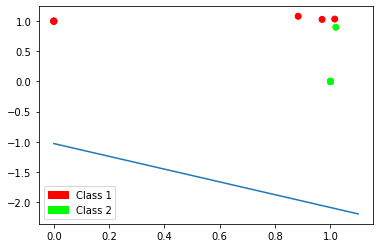

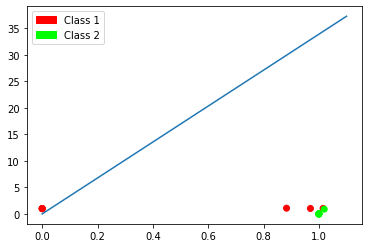

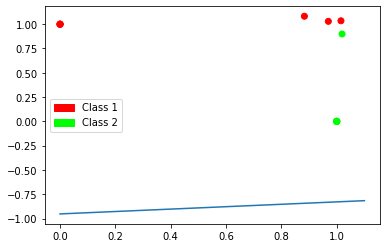

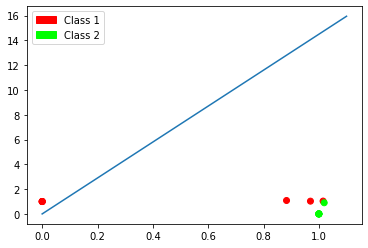

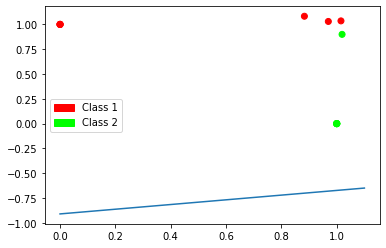

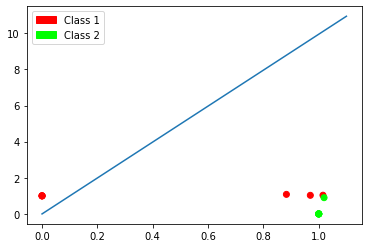

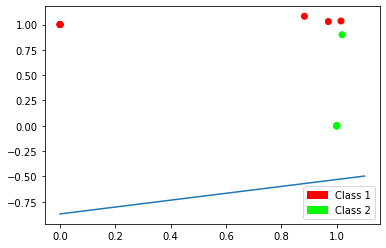

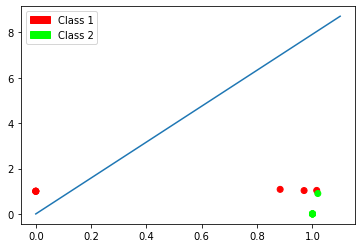

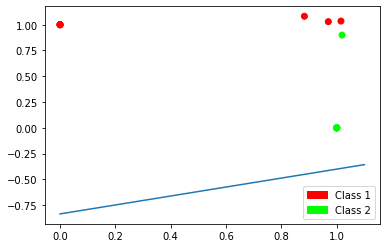

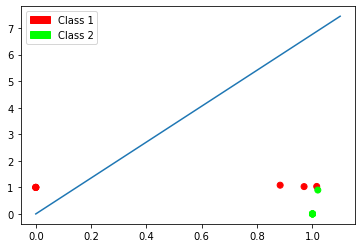

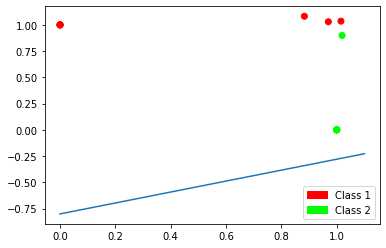

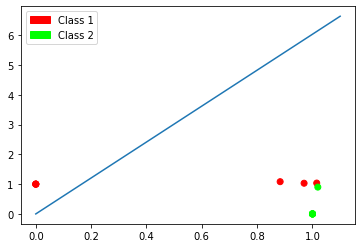

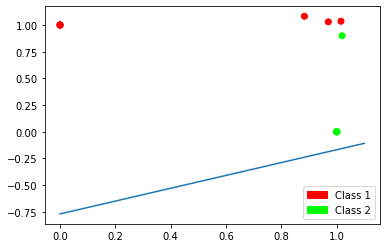

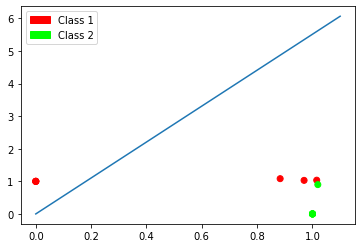

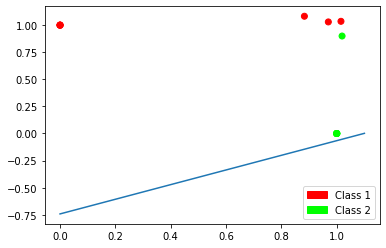

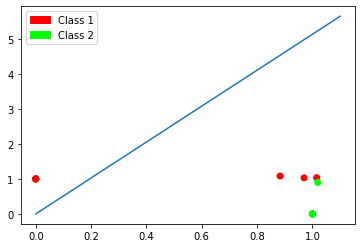

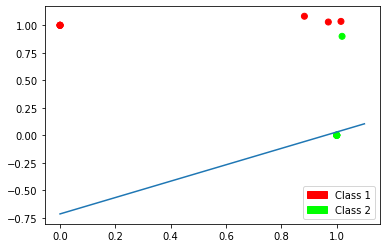

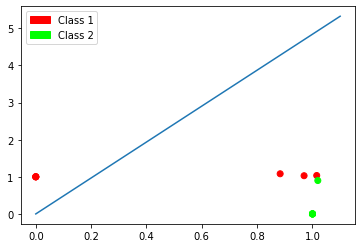

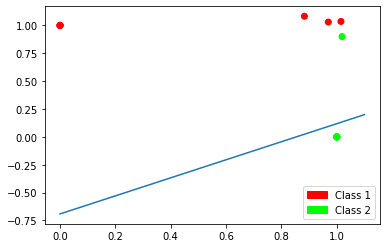

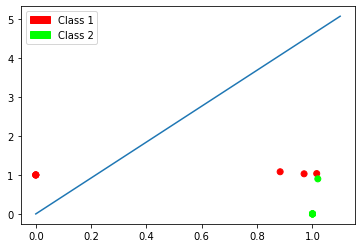

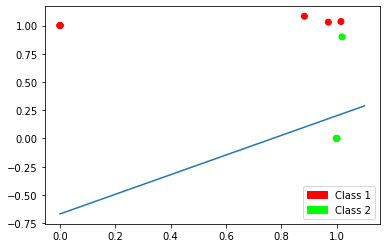

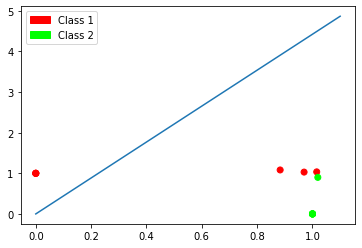

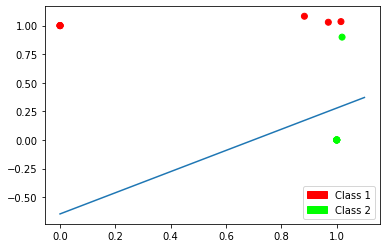

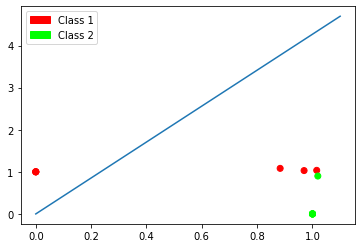

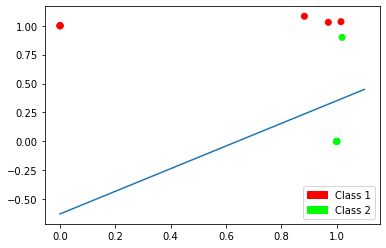

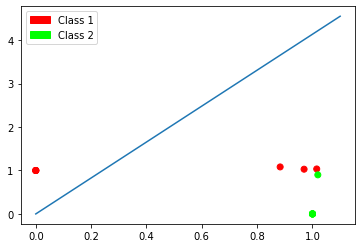

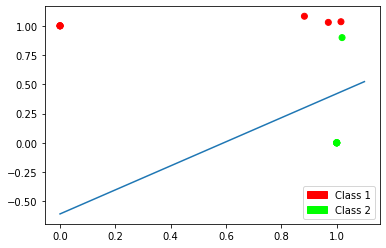

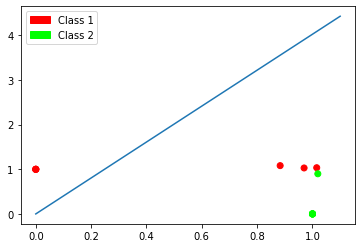

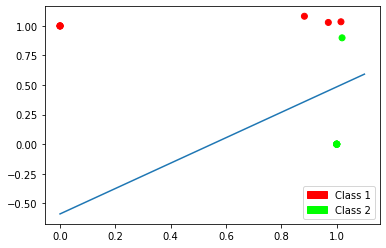

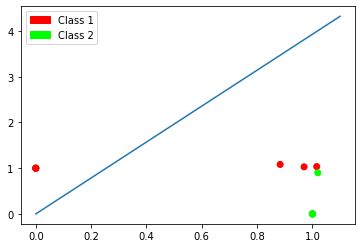

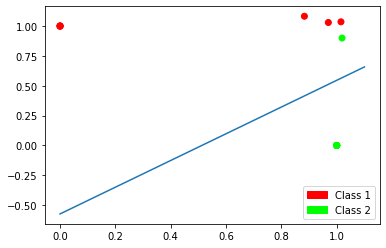

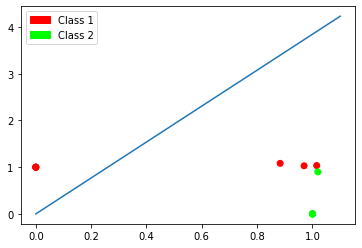

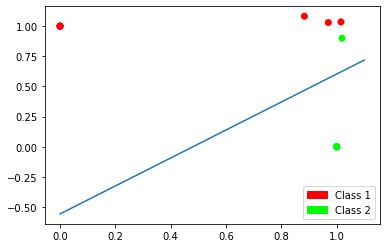

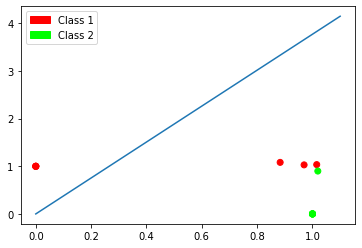

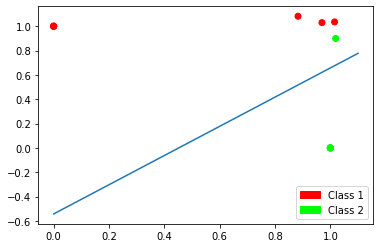

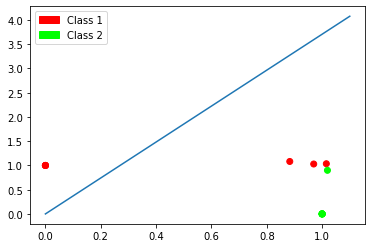

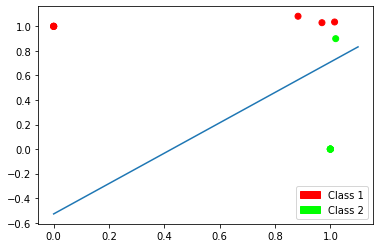

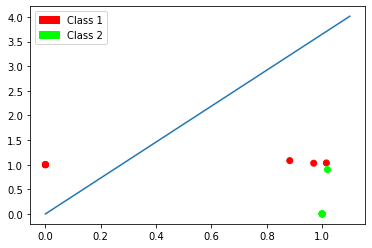

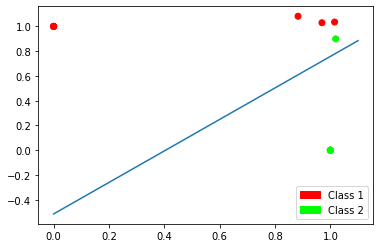

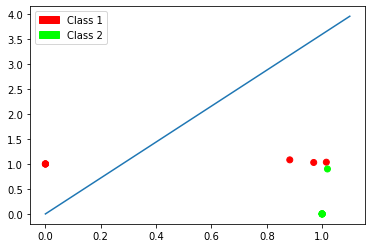

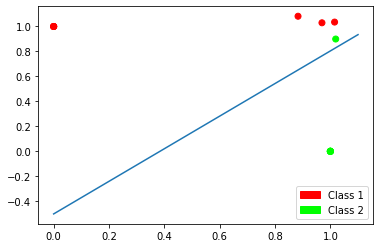

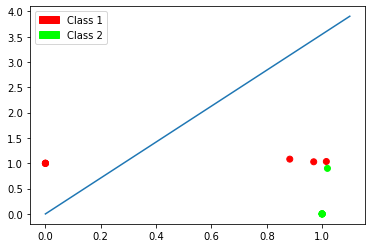

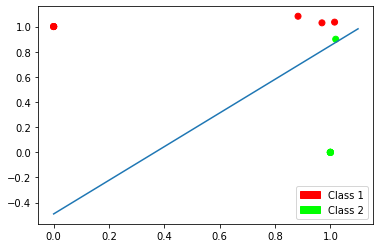

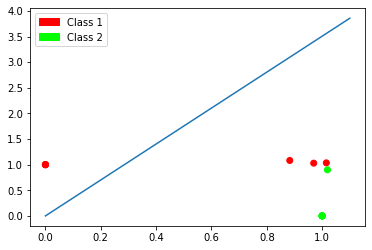

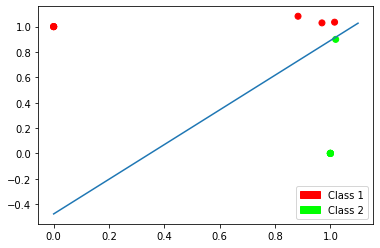

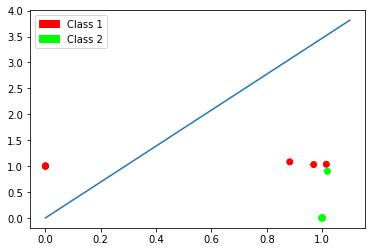

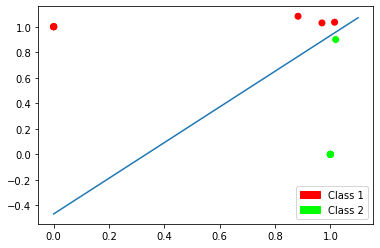

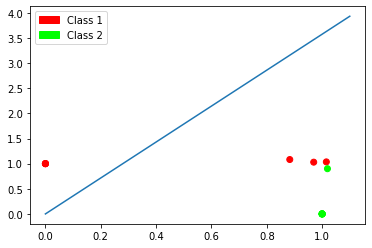

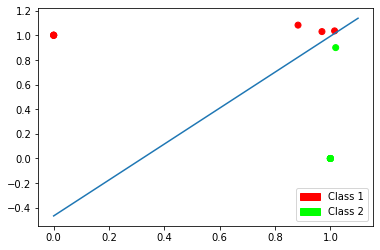

In [ ]:
cm  = ListedColormap(['#FF0000', '#00FF00'])
patch0 = mpatches.Patch(color = '#FF0000', label = 'Class 1')
patch1 = mpatches.Patch(color = '#00FF00', label = 'Class 2')

x1 = np.arange(0, 1.2, 0.1)

for w in weight_vector:
  plt.scatter(X[:,0], X[:,1], c = [0] * 7 + [1] * 7, cmap = cm)
  plt.legend(handles = [patch0, patch1])
  
  slope, c = -w[2] / w[1], -w[0] / w[1]
  plt.plot(x1, slope * x1 + c)
  plt.show()

## SVM

### Defining the necessary functions used

In [ ]:
def SVM(C1, C2):
  x1 = np.array(C1.to_numpy())
  x2 = np.array(C2.to_numpy())

  x = np.vstack((x1, x2))
  y = np.hstack((np.ones(len(x1)), np.ones(len(x2)) * -1))
  
  X = np.dot(x, np.transpose(x))
  Y = np.outer(y, y)

  n = X.shape[0]

  H = matrix(Y * X)
  f = matrix(np.ones(n) * -1)
  A = matrix(np.diag(np.ones(n) * -1))
  a = matrix(np.zeros(n))
  B = matrix(y, (1, n))  
  b = matrix(0.0)
  
  # solve QP problem
  solution = solvers.qp(H, f, A, a, B, b)
  print('')

  # Lagrange multipliers
  t1 = np.ravel(solution['x'])
  
  # Support vectors have non zero lagrange multipliers
  for i in range(0, len(t1)):
    if(t1[i] < 1e-4):
      t1[i] = 0.0
    else:
      t1[i] = round(t1[i], 4)
  
  t1 = np.array(t1)
  print(t1)

  # Weight vector
  w = np.zeros(X.shape[1])
  for i in range(X.shape[1]):
    w[i] = t1[i] * y[i]
  
  w = np.dot(w, x)
  
  # Intercept
  b = 0
  for i in range(len(t1)):
    if(t1[i] != 0.0):
      b = round(1 - np.dot(w, np.transpose(x[i])), 4)
      break
  
  return w, b

### Code

In [ ]:
X = []

for img in ls:
    r, g, b = cv.split(img)
    X.append([np.sum(r)/np.sum(r+g+b), np.sum(g)/np.sum(r+g+b)])

C1 = pd.DataFrame(X)
C1

,0,1
0,0.969622,1.029586
1,0.883140,1.082019
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,1.015281,1.035262


In [ ]:
Y = []

for img in ls2:
    r, g, b = cv.split(img)
    Y.append([np.sum(r)/np.sum(r+g+b), np.sum(g)/np.sum(r+g+b)])

C2 = pd.DataFrame(Y)
C2

,0,1
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,1.019274,0.899458
5,1.000000,0.000000
6,1.000000,0.000000


In [ ]:
w, b = SVM(C1, C2)


print(w)
print('')
print(b)

     pcost       dcost       gap    pres   dres
 0: -3.5318e+00 -1.0519e+01  7e+00  8e-16  2e+00
 1: -6.4286e+00 -8.1498e+00  2e+00  8e-17  9e-01
 2: -3.7324e+01 -4.2474e+01  5e+00  4e-15  9e-01
 3: -7.6169e+01 -9.3636e+01  2e+01  4e-15  7e-01
 4: -1.0565e+02 -1.2390e+02  2e+01  2e-14  3e-01
 5: -1.0930e+02 -1.1091e+02  2e+00  2e-14  2e-02
 6: -1.0932e+02 -1.0934e+02  2e-02  2e-14  2e-04
 7: -1.0932e+02 -1.0932e+02  2e-04  1e-14  2e-06
 8: -1.0932e+02 -1.0932e+02  2e-06  3e-14  2e-08
Optimal solution found.

[ 30.3932   0.       0.       0.       0.       0.      78.9254   0.
   0.       0.       0.     109.3187   0.       0.    ]
[-1.82424974 14.67334115]

-12.3386


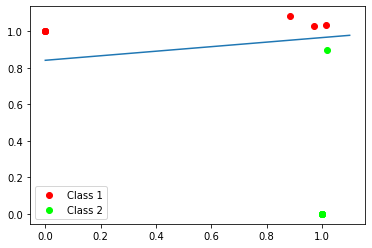

In [ ]:
x1 = np.arange(0, 1.2, 0.1)

plt.scatter(C1.iloc[:, [0]], C1.iloc[:, [1]], label = 'Class 1', color = '#FF0000')
plt.scatter(C2.iloc[:, [0]], C2.iloc[:, [1]], label = 'Class 2', color = '#00FF00')
plt.legend()
  
slope, c = -w[0] / w[1], -b / w[1]
plt.plot(x1, slope * x1 + c)
plt.show()